In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from shutil import copyfile
from os import getcwd

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8431765586295632259
]


In [3]:
print(len(os.listdir('./data/smoker/')))
print(len(os.listdir('./data/non_smoker')))

# Expected Output:
# 249
# 297

249
297


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir('./data_tf')
    os.mkdir('./data_tf/smoker-v-non_smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/training')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing')
    os.mkdir('./data_tf/smoker-v-non_smoker/training/smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/training/non_smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing/smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing/non_smoker')
except OSError:
    pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    temp_files = [f for f in os.listdir(SOURCE) if os.path.getsize(SOURCE+f)>0]
    shuffled_files = random.sample(temp_files, len(temp_files))
    
    for f in shuffled_files[:int(len(temp_files) * SPLIT_SIZE)]:
        copyfile(SOURCE+f, TRAINING+f)
        
    for f in shuffled_files[int(len(temp_files) * SPLIT_SIZE):]:
        copyfile(SOURCE+f, TESTING+f)

In [6]:
SMOKER_SOURCE_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data/smoker/"
TRAINING_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/smoker/"
TESTING_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/smoker/"
NON_SMOKER_SOURCE_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data/non_smoker/"
TRAINING_NON_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/non_smoker/"
TESTING_NON_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/non_smoker/"

split_size = .8
split_data(SMOKER_SOURCE_DIR, TRAINING_SMOKER_DIR, TESTING_SMOKER_DIR, split_size)
split_data(NON_SMOKER_SOURCE_DIR, TRAINING_NON_SMOKER_DIR, TESTING_NON_SMOKER_DIR, split_size)

In [7]:
print(len(os.listdir('./data_tf/smoker-v-non_smoker/training/smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/testing/smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/training/non_smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/testing/non_smoker/')))

240
91
283
106


In [8]:
baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [10]:
TRAINING_DIR = 'C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/'
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=60,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        batch_size=16,
        target_size=(150,150),
        class_mode='binary')

VALIDATION_DIR = 'C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/'
validation_datagen = ImageDataGenerator(rescale= 1./255.)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        batch_size=16,
        target_size=(150,150),
        class_mode = 'binary')

Found 523 images belonging to 2 classes.
Found 197 images belonging to 2 classes.


In [11]:
history = baseline_model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/10
17/33 [==============>...............] - ETA: 6s - loss: 0.8434 - accuracy: 0.5693

C:\ProgramData\Anaconda3\envs\tf_26\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 [==============================] - 19s 566ms/step - loss: 0.7350 - accuracy: 0.6176 - val_loss: 0.5927 - val_accuracy: 0.7005
Epoch 2/10
33/33 [==============================] - 18s 549ms/step - loss: 0.6450 - accuracy: 0.6405 - val_loss: 0.5974 - val_accuracy: 0.7157
Epoch 3/10
33/33 [==============================] - 19s 569ms/step - loss: 0.6196 - accuracy: 0.6654 - val_loss: 0.6456 - val_accuracy: 0.6091
Epoch 4/10
33/33 [==============================] - 20s 620ms/step - loss: 0.6074 - accuracy: 0.6769 - val_loss: 0.5993 - val_accuracy: 0.7310
Epoch 5/10
33/33 [==============================] - 19s 567ms/step - loss: 0.6139 - accuracy: 0.6730 - val_loss: 0.5718 - val_accuracy: 0.7259
Epoch 6/10
33/33 [==============================] - 19s 589ms/step - loss: 0.6015 - accuracy: 0.6711 - val_loss: 0.6250 - val_accuracy: 0.7360
Epoch 7/10
33/33 [==============================] - 19s 574ms/step - loss: 0.6176 - accuracy: 0.6635 - val_loss: 0.5849 - val_accuracy: 0.7259
Epoch 8/10

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

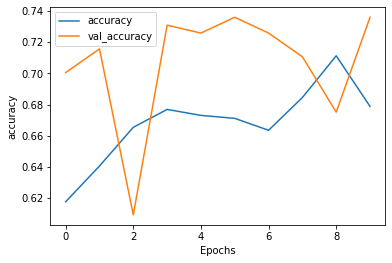

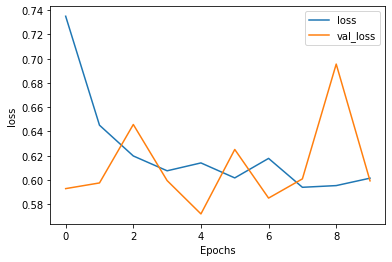

In [15]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Transfer Learning

In [16]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top= False,
                                weights= 'imagenet')

In [17]:
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [18]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [19]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)   
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)  
# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(128, activation = 'relu')(x)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input,x)


es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:
history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = validation_generator,
                    #steps_per_epoch = 100,
                    #validation_steps = 50,
                    verbose = 1,
                    callbacks=[es])

Epoch 1/50
 3/33 [=>............................] - ETA: 12s - loss: 1.0032 - accuracy: 0.5208

C:\ProgramData\Anaconda3\envs\tf_26\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 [==============================] - 27s 816ms/step - loss: 1.2706 - accuracy: 0.6558 - val_loss: 0.3549 - val_accuracy: 0.8274
Epoch 2/50
33/33 [==============================] - 25s 762ms/step - loss: 0.5566 - accuracy: 0.7361 - val_loss: 0.2686 - val_accuracy: 0.9086
Epoch 3/50
33/33 [==============================] - 25s 749ms/step - loss: 0.5085 - accuracy: 0.7533 - val_loss: 0.2484 - val_accuracy: 0.9036
Epoch 4/50
33/33 [==============================] - 25s 752ms/step - loss: 0.4521 - accuracy: 0.7954 - val_loss: 0.2553 - val_accuracy: 0.8883
Epoch 5/50
33/33 [==============================] - 26s 790ms/step - loss: 0.4204 - accuracy: 0.8050 - val_loss: 0.2573 - val_accuracy: 0.8934
Epoch 6/50
33/33 [==============================] - 25s 756ms/step - loss: 0.4804 - accuracy: 0.7897 - val_loss: 0.1615 - val_accuracy: 0.9442
Epoch 7/50
33/33 [==============================] - 25s 758ms/step - loss: 0.4025 - accuracy: 0.8317 - val_loss: 0.1815 - val_accuracy: 0.9137
Epoch 8/50

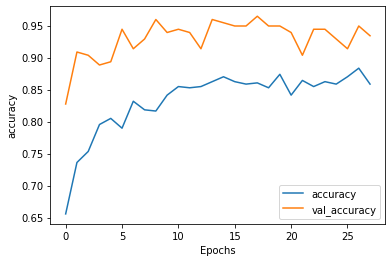

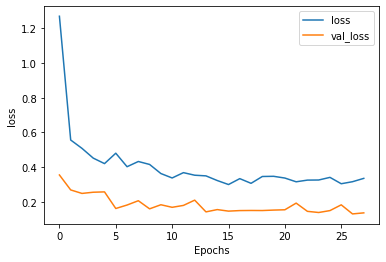

In [22]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
# Save model
model.save('smoker_detection', save_format="tf")

INFO:tensorflow:Assets written to: smoker_detection\assets


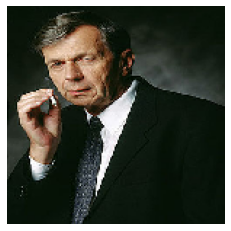

Smoker


In [31]:
# predicting images
from tensorflow.keras.preprocessing import image
import numpy as np

CLASSES = ['Non Smoker', 'Smoker']
SIZE=150

def pedict_smk(path):
    path = "./demo/img.jpg"
    img = image.load_img(path, target_size=(SIZE, SIZE))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    class_pred = CLASSES[int(model.predict(images)[0][0] > 0.5)]
    return class_pred

path = "./demo/img.jpg"
predicted_class = pedict_smk(path)
plt.imshow(img)
plt.axis('Off')
plt.show()
print(classes)

## Serve the model

In [ ]:
MODEL_URI='http://localhost:8501/v1/models/somker_detecter:predict'

In [ ]:
#docker run -p 8501:8501 --name=smoker_detection --mount type=bind,source=C:\Users\yomke\Desktop\DS\portfolio_DS\smoker_detection_deeplearning\smoker_detection\,target=/models/smoker_detector/1 -e MODEL_NAME=smoker_detector -t tensorflow/serving